<a href="https://colab.research.google.com/github/ayman-metwally2020/DSND-2020/blob/master/Copy_of_Twitter_Sentiment_Analysis_Copy1_Arabic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

![image.png](attachment:image.png)

data source:

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [ ]:
# Load the data

ST_df=pd.read_csv('final_text.csv')


In [ ]:
ST_df


Unnamed: 0                                               Text  Class
0            7199                                     كتاب بالف كتاب      5
1           27988   يقدم الكتاب رؤية متصلة لعلم الكلام ويرينا امت...      5
2           10440   عشت لحظات جميلة مع هذا الكتاب حيث نقلنا من خل...      4
3            6008   الأجداد لا بأس . أما الأحفاد فلا يصلحون إلا ل...      5
4           58089   الكتاب يتحدث عن حياة شخص يدعي بيتر هوركوس. وا...      1
...           ...                                                ...    ...
12647       46551   أفكار قد ننتهجها بدون التفكير بها أو قد نبتعد...      4
12648       62916                     من قراءاتي في مرحلة الطفوله :)      4
12649       15546                         من اجمل ما قرأت فى حياتى !      5
12650       46257                                 الرواية جميلة جداً      4
12651       28117   أقرأ الكتاب لأول مرة بتركيز رغم أني قرأته منذ...      3

[12652 rows x 3 columns]

In [ ]:
ST_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12652 entries, 0 to 12651
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12652 non-null  int64 
 1   Text        12652 non-null  object
 2   Class       12652 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 296.7+ KB


In [ ]:
ST_df['Text']=ST_df['Text'].astype(str)

In [ ]:
ST_df.describe()

Unnamed: 0         Class
count  12652.000000  12652.000000
mean   31731.624723      3.866503
std    18303.873734      1.153794
min        0.000000      1.000000
25%    15864.000000      3.000000
50%    31592.000000      4.000000
75%    47760.750000      5.000000
max    63250.000000      5.000000

In [ ]:
ST_df['Text']

0                                           كتاب بالف كتاب
1         يقدم الكتاب رؤية متصلة لعلم الكلام ويرينا امت...
2         عشت لحظات جميلة مع هذا الكتاب حيث نقلنا من خل...
3         الأجداد لا بأس . أما الأحفاد فلا يصلحون إلا ل...
4         الكتاب يتحدث عن حياة شخص يدعي بيتر هوركوس. وا...
                               ...                        
12647     أفكار قد ننتهجها بدون التفكير بها أو قد نبتعد...
12648                       من قراءاتي في مرحلة الطفوله :)
12649                           من اجمل ما قرأت فى حياتى !
12650                                   الرواية جميلة جداً
12651     أقرأ الكتاب لأول مرة بتركيز رغم أني قرأته منذ...
Name: Text, Length: 12652, dtype: object

MINI CHALLENGE #1: 
- Drop the 'id' column from the DataFrame. 
- Ensure that the column has been succesfully dropped. 

In [ ]:
ST_df

Unnamed: 0                                               Text  Class
0            7199                                     كتاب بالف كتاب      5
1           27988   يقدم الكتاب رؤية متصلة لعلم الكلام ويرينا امت...      5
2           10440   عشت لحظات جميلة مع هذا الكتاب حيث نقلنا من خل...      4
3            6008   الأجداد لا بأس . أما الأحفاد فلا يصلحون إلا ل...      5
4           58089   الكتاب يتحدث عن حياة شخص يدعي بيتر هوركوس. وا...      1
...           ...                                                ...    ...
12647       46551   أفكار قد ننتهجها بدون التفكير بها أو قد نبتعد...      4
12648       62916                     من قراءاتي في مرحلة الطفوله :)      4
12649       15546                         من اجمل ما قرأت فى حياتى !      5
12650       46257                                 الرواية جميلة جداً      4
12651       28117   أقرأ الكتاب لأول مرة بتركيز رغم أني قرأته منذ...      3

[12652 rows x 3 columns]

# TASK #3: EXPLORE DATASET

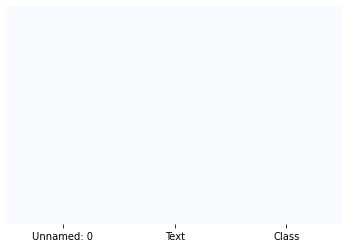

In [ ]:
 sns.heatmap(ST_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d99910250>,
      dtype=object)

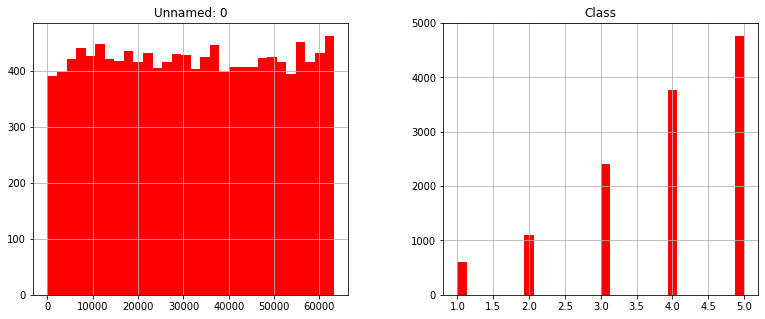

In [ ]:
ST_df.hist(bins = 30, figsize = (13,5), color = 'r')

MINI CHALLENGE #2: 
- Plot similar figure using seaborn countplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


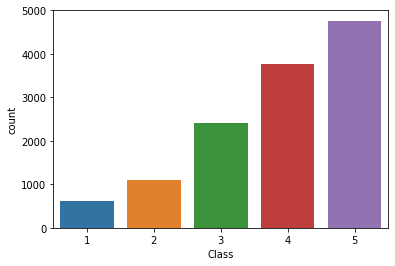

In [ ]:
sns.countplot(ST_df['Class'],label = 'count')

In [ ]:
# Let's get the length of the message
ST_df['length']=ST_df['Text'].apply(len)

In [ ]:
ST_df

Unnamed: 0  ... length
0            7199  ...     15
1           27988  ...    257
2           10440  ...    145
3            6008  ...     53
4           58089  ...    662
...           ...  ...    ...
12647       46551  ...    105
12648       62916  ...     31
12649       15546  ...     27
12650       46257  ...     19
12651       28117  ...    364

[12652 rows x 4 columns]

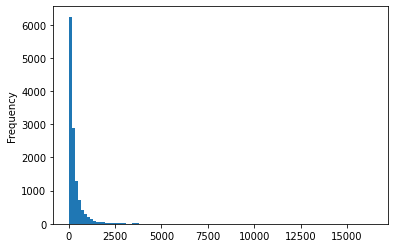

In [ ]:
ST_df['length'].plot(bins=100, kind='hist') 

In [ ]:
ST_df.describe()

Unnamed: 0         Class        length
count  12652.000000  12652.000000  12652.000000
mean   31731.624723      3.866503    334.262093
std    18303.873734      1.153794    572.333564
min        0.000000      1.000000      2.000000
25%    15864.000000      3.000000     73.000000
50%    31592.000000      4.000000    169.000000
75%    47760.750000      5.000000    367.000000
max    63250.000000      5.000000  16390.000000

In [ ]:
# Let's see the shortest message 
ST_df[ST_df['length'] == 2]['Text'].iloc[0]

' ف'

In [ ]:
ST_df[ST_df['length'] == 16390]['Text'].iloc[0]

' كتبت - شيماء عيسى ماذا لو عرض عليك الدكتور عبدالوهاب المسيري صاحب الموسوعة الأشهر عن الصهيونية، أن ترافقه برحلة . لكن التحرك فيها ليس عبر المكان وحده وإنما عبر الزمان أيضا؛ فالكاتب عبر كتابه الشيق "رحلتي الفكرية . البذور والجذور والثمر" يروي أهم المفارقات التي تعرض لها منذ مولده في مدينة دمنهور واحتكاكه بالسياسة والأدب وشكوكه التي انتهت بإيمان أعمق. ارتحل مبكرا للولايات المتحدة الأمريكية بصحبة زوجته الدكتورة هدى . هناك حيث أنجبا طفليهما وانغمسا في أكثر بلاد العالم تقدماً وشاهدا مع ذلك مظاهر سقوط الإنسان . يصف المسيري صداماته مع إسرائيل والحركة الصهيونية التي يصفها دوما بأنها استعمارية لا تؤمن بيهودية ولا تعرف توراة، ويؤكد سعادته بالإنتصار على ذئاب الشهرة وجمع المال والمعلومات، وتحديه للمرض ونشاطه البارز بجماعات المعارضة للفساد في مصر . وأخيرا ينتهي القاريء في الرحلة إلى منزل بديع أقامه المسيري وجمع فيه روائع الفنون والعمارة، وجلس يكتب مذكراته من شرفته ! بدايات . عبدالوهاب المسيري ( أكتوبر 1938- يوليو 2008) نشأ في بيت لعائلة عريقة بمدينة دمنهور ، كان يرى شباب القرية الثائر الذي لا يكف

In [ ]:
N=ST_df[ST_df['Class']==3]

In [ ]:
N

Unnamed: 0  ... length
10          54562  ...     94
20          34047  ...    198
21          25475  ...   1514
28          27200  ...    208
42          37339  ...    826
...           ...  ...    ...
12630       42228  ...    167
12632       46561  ...     88
12635       12539  ...    130
12646       32516  ...   1057
12651       28117  ...    364

[2415 rows x 4 columns]

In [ ]:
negative=ST_df[ST_df['Class']==1] 

In [ ]:
negative

Unnamed: 0  ... length
4           58089  ...    662
15          35578  ...   1088
37          40124  ...    624
91          24949  ...     55
162         25441  ...    142
...           ...  ...    ...
12473       29398  ...      8
12486       14309  ...    526
12514       63005  ...     88
12636       43205  ...     30
12641       18350  ...    145

[606 rows x 4 columns]

In [ ]:
positive=ST_df[ST_df['Class']==5]

In [ ]:
positive

Unnamed: 0  ... length
0            7199  ...     15
1           27988  ...    257
3            6008  ...     53
5           49671  ...    100
6           37312  ...     52
...           ...  ...    ...
12639       61020  ...     40
12640       35831  ...    140
12642       43599  ...    140
12643       36491  ...     21
12649       15546  ...     27

[4762 rows x 4 columns]

MINI CHALLENGE #3
- View the message with the average length

# TASK #4: PLOT THE WORDCLOUD

In [ ]:
sentences=ST_df['Text'].tolist()

In [ ]:
sentences

[' كتاب بالف كتاب',
 ' يقدم الكتاب رؤية متصلة لعلم الكلام ويرينا امتداد الفرق الدينية في مختلف الديانات فنجدها تتناقل ارثها بشكل يكاد يكون متوافقا بين الديانات المختلفة على الرغم من البعد الزماني يعطينا الكتاب مدخلا لفهم تصرفات الجماعات الدينية اعتمادا على تاريخها وعلى معتقداتها',
 ' عشت لحظات جميلة مع هذا الكتاب حيث نقلنا من خلال اسلوبه ووصفه الى ميادين المعارك والغزوات والاحداث الهامة في حياة حبيبنا محمد صلى الله عليه وسلم.',
 ' الأجداد لا بأس . أما الأحفاد فلا يصلحون إلا للإحتلال',
 ' الكتاب يتحدث عن حياة شخص يدعي بيتر هوركوس. والحادثة التي جعلته يستطيع التنبؤ بأشياء ستحدث في المستقبل. الكتاب غريب ويفترض أن هذه الأحداث جميعها حقيقية. وهو يعزي هذه الظاهرة لحادث الذي تعرض له بيتر والذي أثر في دماغه بشكل أو بآخر وجعله عنده هذه القدرة غير الطبيعية. أحداث الكتاب معظمها متشابهة . أحسست بالملل منذ بداية الكتاب. حيث كنت أتوقع أنه سيتم كشف السر المتعلق بهذه الظاهرة. إلا أن الكاتب يبقي هذه السر قيد المجهول ويعرض الأحداث فقط ليجعل القارئ يتساءل عن سبب هذه الظاهرة. لا ننكر غرابة هذه القدرات . ل

In [ ]:
len(sentences)

12652

In [ ]:
text=" ".join(sentences)

In [ ]:
text

' كتاب بالف كتاب  يقدم الكتاب رؤية متصلة لعلم الكلام ويرينا امتداد الفرق الدينية في مختلف الديانات فنجدها تتناقل ارثها بشكل يكاد يكون متوافقا بين الديانات المختلفة على الرغم من البعد الزماني يعطينا الكتاب مدخلا لفهم تصرفات الجماعات الدينية اعتمادا على تاريخها وعلى معتقداتها  عشت لحظات جميلة مع هذا الكتاب حيث نقلنا من خلال اسلوبه ووصفه الى ميادين المعارك والغزوات والاحداث الهامة في حياة حبيبنا محمد صلى الله عليه وسلم.  الأجداد لا بأس . أما الأحفاد فلا يصلحون إلا للإحتلال  الكتاب يتحدث عن حياة شخص يدعي بيتر هوركوس. والحادثة التي جعلته يستطيع التنبؤ بأشياء ستحدث في المستقبل. الكتاب غريب ويفترض أن هذه الأحداث جميعها حقيقية. وهو يعزي هذه الظاهرة لحادث الذي تعرض له بيتر والذي أثر في دماغه بشكل أو بآخر وجعله عنده هذه القدرة غير الطبيعية. أحداث الكتاب معظمها متشابهة . أحسست بالملل منذ بداية الكتاب. حيث كنت أتوقع أنه سيتم كشف السر المتعلق بهذه الظاهرة. إلا أن الكاتب يبقي هذه السر قيد المجهول ويعرض الأحداث فقط ليجعل القارئ يتساءل عن سبب هذه الظاهرة. لا ننكر غرابة هذه القدرات . لكن أن يكون موضوع 

In [ ]:
import os
!pip install python-bidi
!pip install arabic_reshaper
import arabic_reshaper
from bidi.algorithm import get_display
import codecs 
!pip install WordCloud
from wordcloud import WordCloud
f=codecs.open('val_labr.csv','r','utf-8')#read the whole text 
text=arabic_reshaper.reshape(f.read()) #make the text readable for non arabic liabiry 
text=get_display(text)
wordcloud=WordCloud(font_path='fonts/arabtype.ttf').generate(text)
plt.figure(figsize=(20,20))

plt.imshow(wordcloud,interpolation= "bilnear")
plt.show()

OSError: ignored

MINI CHALLENGE #4: 
- Plot the wordcloud of the "negative" dataframe. 
- What do you notice? Does the data make sense?

In [ ]:
negative_list=negative['text'].tolist ()
negative_sentences_as_one_string=" ".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud().generate(text))

# TASK #5: PERFORM DATA CLEANING - REMOVE PUNCTUATION FROM TEXT

In [ ]:
import string
string.punctuation

In [ ]:
test_punc_removed=[char for char in text if char not in string.punctuation]

In [ ]:
test_punc_removed

In [ ]:
# Join the characters again to form the string.
Test_punc_removed_join =''.join(test_punc_removed)
Test_punc_removed_join

MINI CHALLENGE #5: 
- Remove punctuations using a different method


In [ ]:
Test_punc_removed =[]
for char in Test:
    if char not in string.punctuation:
        Test_punc_removed.append(char)
Test_punc_removed_join=''.join(Test_punc_removed)
Test_punc_removed_join

# TASK 6: PERFORM DATA CLEANING - REMOVE STOPWORDS

In [ ]:
import nltk # Natural Language tool kit 

nltk.download('stopwords')

In [ ]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('Arabic')

In [ ]:
Test_punc_removed_join_clean =[ word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [ ]:
Test_punc_removed_join_clean = ''.join(Test_punc_removed_join)
Test_punc_removed_join_clean

In [ ]:
Test_punc_removed_join_clean # Only bimportant (no so common) words are left

In [ ]:
Test_punc_removed =[]
for char in Test :
    if char not in stopwords.words('english'):
        Test_punc_removed.append(char)
Test_punc_removed_join

MINI CHALLENGE #6: 
- For the following text, create a pipeline to remove punctuations followed by removing stopwords

In [ ]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

In [ ]:
challege = [ char     for char in mini_challenge  if char not in string.punctuation ]
challenge = ''.join(challege)
challenge = [  word for word in challenge.split() if word.lower() not in stopwords.words('english')  ] b

In [ ]:
challenge

# TASK 7: PERFORM COUNT VECTORIZATION (TOKENIZATION)

![image.png](attachment:image.png)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)


In [ ]:
print (vectorizer.get_feature_names())

In [ ]:
print(X.toarray())

MINI CHALLENGE #7:
- Without doing any code, perform count vectorization for the following list:
    -  mini_challenge = ['Hello World','Hello Hello World','Hello World world world']
- Confirm your answer with code

In [ ]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']

vectorizer_challenge = CountVectorizer()
X_challenge = vectorizer_challenge.fit_transform(mini_challenge)
print(X_challenge.toarray())

# TASK #8: CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [ ]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [ ]:
# Let's test the newly added function
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [ ]:
print(tweets_df_clean[5]) # show the cleaned up version

In [ ]:
print(tweets_df['tweet'][5]) # show the original version

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer =CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(tweets_df['tweet']).toarray() 


In [ ]:
tweets_countvectorizer.shape

In [ ]:
print(vectorizer.get_feature_names())


In [ ]:
print(tweets_countvectorizer.ndarray())  

In [ ]:
tweets_countvectorizer.shape

In [ ]:
tweets = pd.DataFrame(tweets_countvectorizer.toarray())


In [ ]:
X = tweets


In [ ]:
X

In [ ]:
y = tweets_df['label']

# TASK #9: UNDERSTAND THE THEORY AND INTUITION BEHIND NAIVE BAYES

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

MINI CHALLENGE #8

![image.png](attachment:image.png)

# TASK #10: TRAIN A NAIVE BAYES CLASSIFIER MODEL

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

# TASK #11: ASSESS TRAINED MODEL PERFORMANCE  

![image.png](attachment:image.png)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

MINI CHALLENGE #9: 
- Retrain and reassess the model using a different type of classifier such as logistic regression classifier

MINI CHALLENGE SOLUTIONS

MINI CHALLENGE #1

In [ ]:
# Drop the 'id' column
tweets_df = tweets_df.drop(['id'], axis=1)

MINI CHALLENGE #2

In [ ]:
sns.countplot(tweets_df['label'], label = "Count") 

MINI CHALLENGE #3

In [ ]:
# Let's see the message with mean length 
tweets_df[tweets_df['length'] == 84]['tweet'].iloc[0]

MINI CHALLENGE #4

In [ ]:
negative_list = negative['tweet'].tolist()
negative_list
negative_sentences_as_one_string = " ".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

MINI CHALLENGE #5

In [ ]:
Test_punc_removed = []
for char in Test: 
    if char not in string.punctuation:
        Test_punc_removed.append(char)
        
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

MINI CHALLENGE #6

In [ ]:
challege = [ char     for char in mini_challenge  if char not in string.punctuation ]
challenge = ''.join(challege)
challenge = [  word for word in challenge.split() if word.lower() not in stopwords.words('english')  ] 

MINI CHALLENGE #7

In [ ]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']

vectorizer_challenge = CountVectorizer()
X_challenge = vectorizer_challenge.fit_transform(mini_challenge)
print(X_challenge.toarray())

MINI CHALLENGE #8

![image.png](attachment:image.png)